In [15]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

### ANALYSIS OF MTA SUBWAY AND WEATHER (2020-2024) ###



## MTA EDA ##

In [57]:
mta_metrics = pd.read_csv('data/MTA_Subway_Customer_Metrics_2020-2024.csv')

In [58]:
mta_metrics.head()

,month,division,line,period,num_passengers,additional platform time,additional train time,total_apt,total_att,over_five_mins,over_five_mins_perc,customer journey time performance
0,2024-12-01,A DIVISION,1,offpeak,5034590.0,0.962958,0.738045,4848099.5,3715755.0,643165.40,0.127749,0.872251
1,2024-12-01,A DIVISION,1,peak,5552918.0,1.020276,0.662142,5665509.0,3676820.8,624175.44,0.112405,0.887595
2,2024-12-01,A DIVISION,2,offpeak,3078700.2,1.425670,0.726788,4389210.5,2237562.2,555590.80,0.180463,0.819537
3,2024-12-01,A DIVISION,2,peak,3672602.5,1.147720,0.448690,4215117.5,1647861.6,483096.44,0.131541,0.868459
4,2024-12-01,A DIVISION,3,offpeak,2344247.5,0.984354,0.456582,2307569.0,1070340.6,293768.30,0.125315,0.874685


In [62]:
mta_metrics.describe()
print(type(mta_metrics['month'][0]))

<class 'str'>


In [64]:
mta_metrics['month'] = pd.to_datetime(mta_metrics['month'], format='%Y-%m-%d')


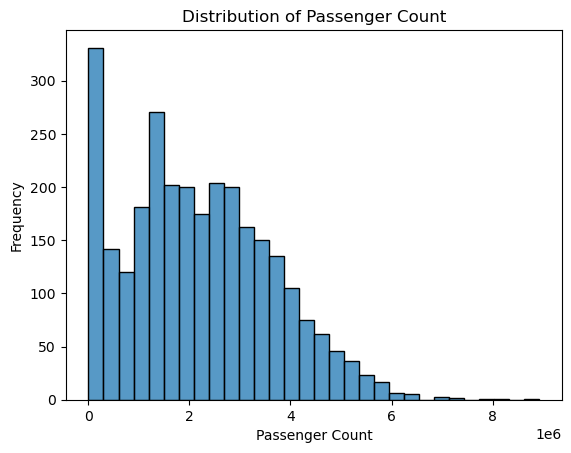

In [65]:
sns.histplot(mta_metrics['num_passengers'], bins=30)
plt.title('Distribution of Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Frequency')
plt.show()

/var/folders/1t/89rcg0rj2wvbvx9bzx26914r0000gp/T/ipykernel_26085/824651171.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=mta_metrics, x='month', y='num_passengers', ci=None)


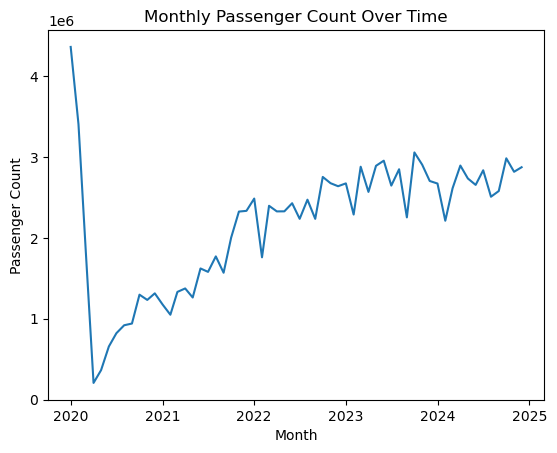

In [70]:
sns.lineplot(data=mta_metrics, x='month', y='num_passengers', ci=None)
plt.title('Monthly Passenger Count Over Time')
plt.xlabel('Month')
plt.ylabel('Passenger Count')
plt.show()

## WEATHER EDA ##

In [18]:
weather_A_df = pd.read_csv('data/Jan_2020-Dec_2022_weather.csv')
weather_B_df = pd.read_csv('data/Jan_2023-Dec_2024_weather.csv')

In [19]:
weather_A_df.head()

,STATION,LATITUDE,LONGITUDE,ELEVATION,DATE,AWND,CDSD,DSND,DSNW,EMNT,...,HDSD,PRCP,SNOW,TAVG,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5
0,US1NJUN0028,40.708904,-74.321518,37.5,2020-01,NaN,NaN,NaN,NaN,NaN,...,NaN,2.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,US1NJUN0028,40.708904,-74.321518,37.5,2020-02,NaN,NaN,NaN,NaN,NaN,...,NaN,3.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,US1NJUN0028,40.708904,-74.321518,37.5,2020-03,NaN,NaN,NaN,NaN,NaN,...,NaN,4.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,US1NJUN0028,40.708904,-74.321518,37.5,2020-04,NaN,NaN,NaN,NaN,NaN,...,NaN,4.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,US1NJUN0028,40.708904,-74.321518,37.5,2020-05,NaN,NaN,NaN,NaN,NaN,...,NaN,2.64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
weather_B_df.head()

,STATION,LATITUDE,LONGITUDE,ELEVATION,DATE,AWND,CDSD,DSND,DSNW,EMNT,...,HDSD,PRCP,SNOW,TAVG,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5
0,US1NJUN0028,40.708904,-74.321518,37.5,2023-01,NaN,NaN,NaN,NaN,NaN,...,NaN,5.53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,US1NJUN0028,40.708904,-74.321518,37.5,2023-02,NaN,NaN,NaN,NaN,NaN,...,NaN,0.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,US1NJUN0028,40.708904,-74.321518,37.5,2023-03,NaN,NaN,NaN,NaN,NaN,...,NaN,3.44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,US1NJUN0028,40.708904,-74.321518,37.5,2023-04,NaN,NaN,NaN,NaN,NaN,...,NaN,5.54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,US1NJUN0028,40.708904,-74.321518,37.5,2023-05,NaN,NaN,NaN,NaN,NaN,...,NaN,4.32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
weather_df = pd.concat([weather_A_df, weather_B_df])
weather_df.shape

(4847, 24)

In [22]:
weather_df.drop(['STATION', 'LATITUDE', 'LONGITUDE', 'ELEVATION'], axis=1, inplace=True)
weather_df.shape

(4847, 20)

In [23]:
weather_df.isnull().sum()

DATE       0
AWND    4369
CDSD    4007
DSND    3583
DSNW    3375
EMNT    3973
EMSD    3583
EMSN    3375
EMXP     328
EMXT    3973
HDSD    4006
PRCP      19
SNOW    3375
TAVG    3973
TMAX    3973
TMIN    3973
WDF2    4375
WDF5    4375
WSF2    4375
WSF5    4375
dtype: int64

In [24]:
weather_df.drop(['AWND', 'CDSD', 'DSNW', 'EMSD', 'EMSN', 'HDSD', 'WDF2', 'WDF5', 'WSF2', 'WSF5'], axis=1, inplace=True)
weather_df.head()

,DATE,DSND,EMNT,EMXP,EMXT,PRCP,SNOW,TAVG,TMAX,TMIN
0,2020-01,NaN,NaN,1.29,NaN,2.11,NaN,NaN,NaN,NaN
1,2020-02,NaN,NaN,0.59,NaN,3.15,NaN,NaN,NaN,NaN
2,2020-03,NaN,NaN,1.09,NaN,4.03,NaN,NaN,NaN,NaN
3,2020-04,NaN,NaN,0.95,NaN,4.14,NaN,NaN,NaN,NaN
4,2020-05,NaN,NaN,0.59,NaN,2.64,NaN,NaN,NaN,NaN


In [25]:
weather = weather_df.rename(columns={'DSND':'days_snow_on_ground', 'EMNT':'extreme_min_temp', 'EMXP':'extreme_max_precip','EMXT':'extreme_max_temp','PRCP':'precip','SNOW':'snow','TAVG':'avg_temp','TMAX':'max_temp','TMIN':'min_temp'})
weather.isnull().sum()

DATE                      0
days_snow_on_ground    3583
extreme_min_temp       3973
extreme_max_precip      328
extreme_max_temp       3973
precip                   19
snow                   3375
avg_temp               3973
max_temp               3973
min_temp               3973
dtype: int64

In [26]:
weather.fillna(0, inplace=True)

In [27]:
weather.isnull().sum()

DATE                   0
days_snow_on_ground    0
extreme_min_temp       0
extreme_max_precip     0
extreme_max_temp       0
precip                 0
snow                   0
avg_temp               0
max_temp               0
min_temp               0
dtype: int64

In [28]:
# Converting DATE into datetime type

weather['DATE'] = pd.to_datetime(weather['DATE'])
weather.head()

,DATE,days_snow_on_ground,extreme_min_temp,extreme_max_precip,extreme_max_temp,precip,snow,avg_temp,max_temp,min_temp
0,2020-01-01,0.0,0.0,1.29,0.0,2.11,0.0,0.0,0.0,0.0
1,2020-02-01,0.0,0.0,0.59,0.0,3.15,0.0,0.0,0.0,0.0
2,2020-03-01,0.0,0.0,1.09,0.0,4.03,0.0,0.0,0.0,0.0
3,2020-04-01,0.0,0.0,0.95,0.0,4.14,0.0,0.0,0.0,0.0
4,2020-05-01,0.0,0.0,0.59,0.0,2.64,0.0,0.0,0.0,0.0


/var/folders/1t/89rcg0rj2wvbvx9bzx26914r0000gp/T/ipykernel_26085/3338247434.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=weather, x="DATE", y="precip", ci=None)


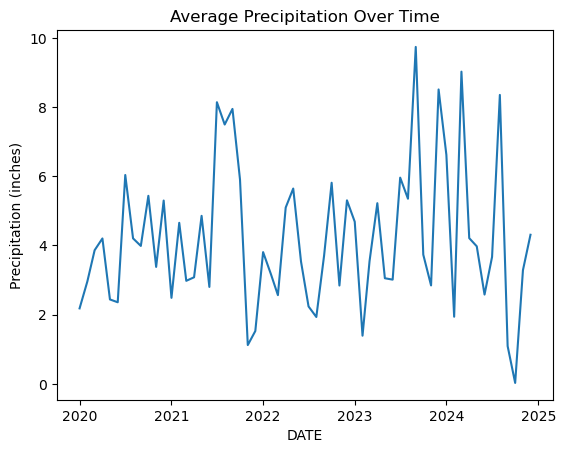

In [71]:
# Plotting precipitation data to make sure it makes sense:

sns.lineplot(data=weather, x="DATE", y="precip", ci=None)

plt.title('Average Precipitation Over Time')
plt.xlabel('DATE')
plt.ylabel('Precipitation (inches)')
plt.show()

<Axes: xlabel='precip', ylabel='Count'>

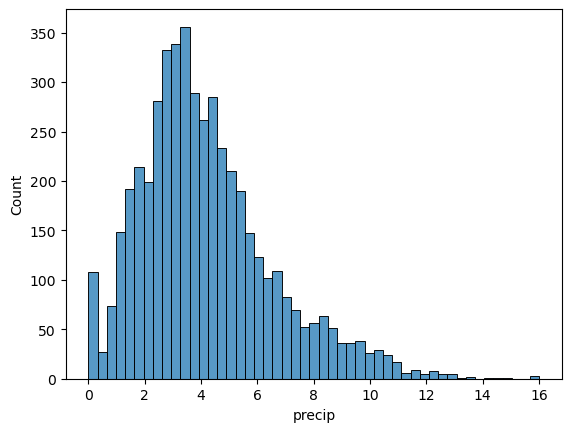

In [31]:
sns.histplot(weather['precip'])

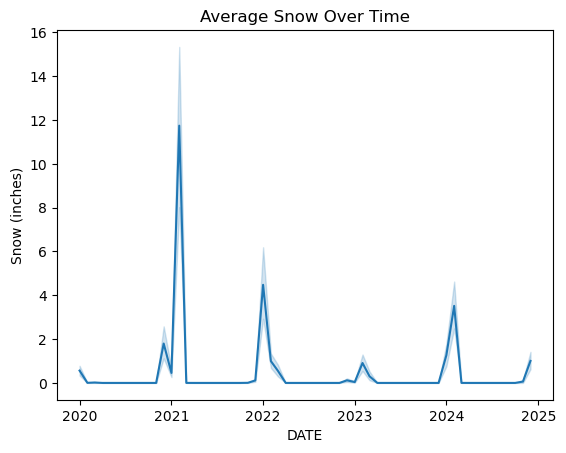

In [33]:
sns.lineplot(data=weather, x="DATE", y="snow")
plt.title('Average Snow Over Time')
plt.xlabel('DATE')
plt.ylabel('Snow (inches)')
plt.show()

In [49]:
temp_data = weather[(weather['avg_temp'] != 0) | (weather['max_temp'] != 0) | (weather['min_temp'] != 0)]
temp_data.describe()

,DATE,days_snow_on_ground,extreme_min_temp,extreme_max_precip,extreme_max_temp,precip,snow,avg_temp,max_temp,min_temp
count,874,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000
mean,2022-07-03 01:35:33.638444032,0.607551,35.290618,1.373730,79.339817,4.004668,0.789931,55.746682,64.104577,47.388787
min,2020-01-01 00:00:00,0.000000,0.000000,0.000000,48.000000,0.000000,0.000000,26.200000,34.200000,18.100000
25%,2021-04-01 00:00:00,0.000000,23.000000,0.712500,67.000000,2.390000,0.000000,42.325000,50.100000,34.225000
50%,2022-07-01 00:00:00,0.000000,33.000000,1.140000,82.000000,3.740000,0.000000,54.950000,63.850000,46.050000
75%,2023-10-01 00:00:00,0.000000,50.000000,1.730000,91.000000,5.050000,0.000000,69.775000,78.075000,60.900000
max,2024-12-01 00:00:00,28.000000,68.000000,8.590000,103.000000,15.840000,31.700000,82.800000,92.100000,75.200000
std,NaN,2.736288,16.961184,1.095879,13.475109,2.384728,3.392622,15.142806,15.638980,14.781015


/var/folders/1t/89rcg0rj2wvbvx9bzx26914r0000gp/T/ipykernel_26085/396578511.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=temp_data, x='DATE', y='avg_temp', ci=None)


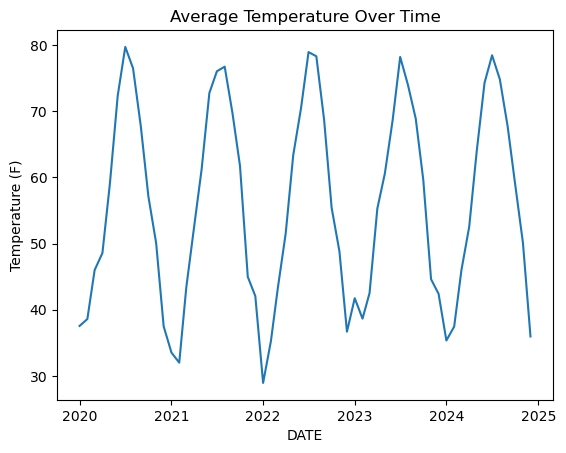

In [54]:
sns.lineplot(data=temp_data, x='DATE', y='avg_temp', ci=None)
plt.title('Average Temperature Over Time')
plt.xlabel('DATE')
plt.ylabel('Temperature (F)')
plt.show()